# Nettoyage

## Importation des bibliothèques

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

In [3]:
dataset = pd.read_csv('dataset.csv', nrows=1000)

In [4]:
dataset.head()

,id_stat,nom_region,nom_espece,date_plantation,superficie,pluviometrie,temperature_min,temperature_max,taux_survie_plants,rendement_moyen,annee
0,1,Abidjan,Cacao,2023-04-26,311.35,221.88,23.68,27.66,81.44,9.40,2019
1,1,Abidjan,Cacao,2023-08-20,141.35,221.88,23.68,27.66,81.44,9.40,2019
2,1,Abidjan,Cacao,2024-03-27,301.74,221.88,23.68,27.66,81.44,9.40,2019
3,2,Abidjan,Café,2019-06-26,114.35,92.11,23.94,34.81,75.21,6.29,2019
4,2,Abidjan,Café,2019-12-01,253.65,92.11,23.94,34.81,75.21,6.29,2019


Ajout de nouvelle colonne

In [5]:
# Convertir la colonne 'date' en type datetime
dataset['date_plantation'] = pd.to_datetime(dataset['date_plantation'], errors='coerce')  # Gestion des erreurs pour les dates non valides

# Ajouter la colonne température moyenne
dataset['temperature_moyenne'] = (dataset['temperature_min'] + dataset['temperature_max']) / 2

# Ajouter la colonne mois de plantation
dataset['mois_plantation'] = dataset['date_plantation'].dt.month

# Afficher les premières lignes du dataset enrichi
dataset.head()

,id_stat,nom_region,nom_espece,date_plantation,superficie,pluviometrie,temperature_min,temperature_max,taux_survie_plants,rendement_moyen,annee,temperature_moyenne,mois_plantation
0,1,Abidjan,Cacao,2023-04-26,311.35,221.88,23.68,27.66,81.44,9.40,2019,25.670,4
1,1,Abidjan,Cacao,2023-08-20,141.35,221.88,23.68,27.66,81.44,9.40,2019,25.670,8
2,1,Abidjan,Cacao,2024-03-27,301.74,221.88,23.68,27.66,81.44,9.40,2019,25.670,3
3,2,Abidjan,Café,2019-06-26,114.35,92.11,23.94,34.81,75.21,6.29,2019,29.375,6
4,2,Abidjan,Café,2019-12-01,253.65,92.11,23.94,34.81,75.21,6.29,2019,29.375,12


In [6]:
# Suppression des colonnes inutiles
colonnes_a_supprimer = ['id_stat', 'date_plantation', 'temperature_min', 'temperature_max', 'taux_survie_plants']
dataset = dataset.drop(columns=colonnes_a_supprimer)

# Afficher les premières lignes du dataset mis à jour
dataset.head()


,nom_region,nom_espece,superficie,pluviometrie,rendement_moyen,annee,temperature_moyenne,mois_plantation
0,Abidjan,Cacao,311.35,221.88,9.40,2019,25.670,4
1,Abidjan,Cacao,141.35,221.88,9.40,2019,25.670,8
2,Abidjan,Cacao,301.74,221.88,9.40,2019,25.670,3
3,Abidjan,Café,114.35,92.11,6.29,2019,29.375,6
4,Abidjan,Café,253.65,92.11,6.29,2019,29.375,12


In [7]:
import numpy as np

# Suppression des outliers de la colonne 'pluviometrie' avec la méthode IQR
def remove_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)  # Premier quartile
    Q3 = data[column].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Écart interquartile
    lower_bound = Q1 - 1.5 * IQR  # Borne inférieure
    upper_bound = Q3 + 1.5 * IQR  # Borne supérieure
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Appliquer la suppression des outliers sur la pluviométrie
dataset_cleaned = remove_outliers_IQR(dataset, 'pluviometrie')

# Ajouter une colonne avec la transformation logarithmique de la pluviométrie nettoyée
dataset_cleaned['log_pluviometrie'] = np.log1p(dataset_cleaned['pluviometrie'])

# Afficher un aperçu du dataset mis à jour
dataset_cleaned.head()


,nom_region,nom_espece,superficie,pluviometrie,rendement_moyen,annee,temperature_moyenne,mois_plantation,log_pluviometrie
0,Abidjan,Cacao,311.35,221.88,9.40,2019,25.670,4,5.406634
1,Abidjan,Cacao,141.35,221.88,9.40,2019,25.670,8,5.406634
2,Abidjan,Cacao,301.74,221.88,9.40,2019,25.670,3,5.406634
3,Abidjan,Café,114.35,92.11,6.29,2019,29.375,6,4.533782
4,Abidjan,Café,253.65,92.11,6.29,2019,29.375,12,4.533782


Analyse de la Pluiviometrie

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

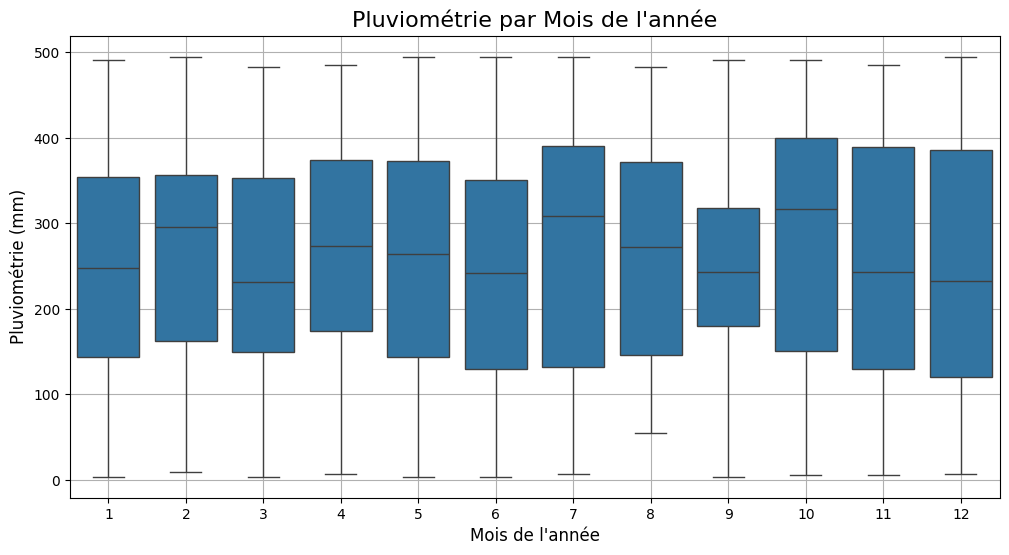

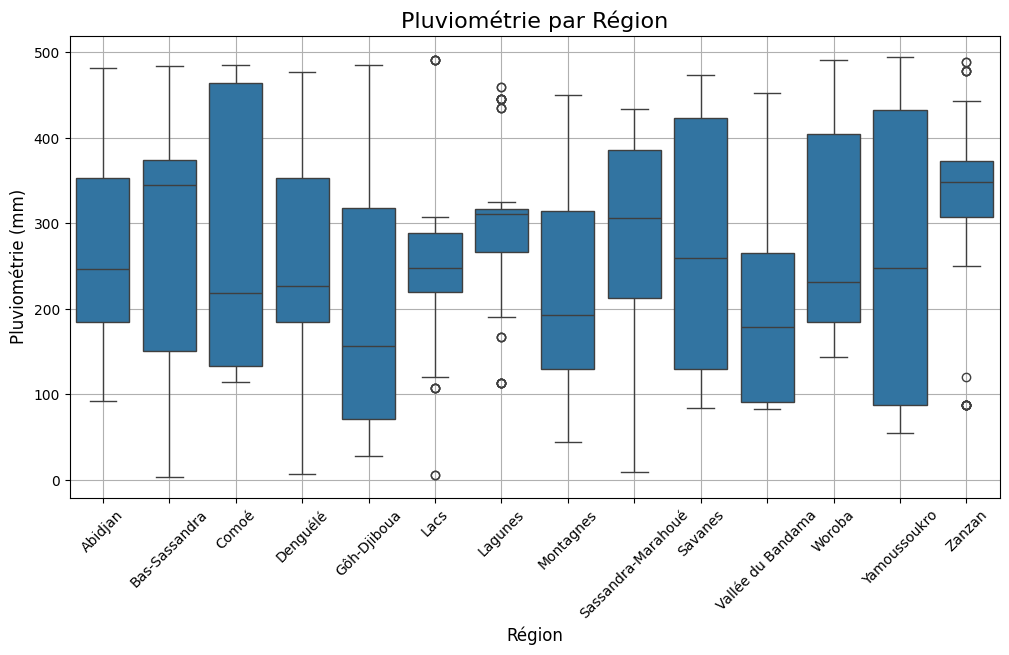

In [11]:
# Relation entre pluviométrie et les mois de l'année
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='mois_plantation', y='pluviometrie')
plt.title('Pluviométrie par Mois de l\'année', fontsize=16)
plt.xlabel('Mois de l\'année', fontsize=12)
plt.ylabel('Pluviométrie (mm)', fontsize=12)
plt.grid(True)
plt.show()

# Relation entre pluviométrie et les régions
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset_cleaned, x='nom_region', y='pluviometrie')
plt.title('Pluviométrie par Région', fontsize=16)
plt.xlabel('Région', fontsize=12)
plt.ylabel('Pluviométrie (mm)', fontsize=12)
plt.xticks(rotation=45)  # Rotation des étiquettes pour les régions
plt.grid(True)
plt.show()

Analyse de la tendance du rendement 

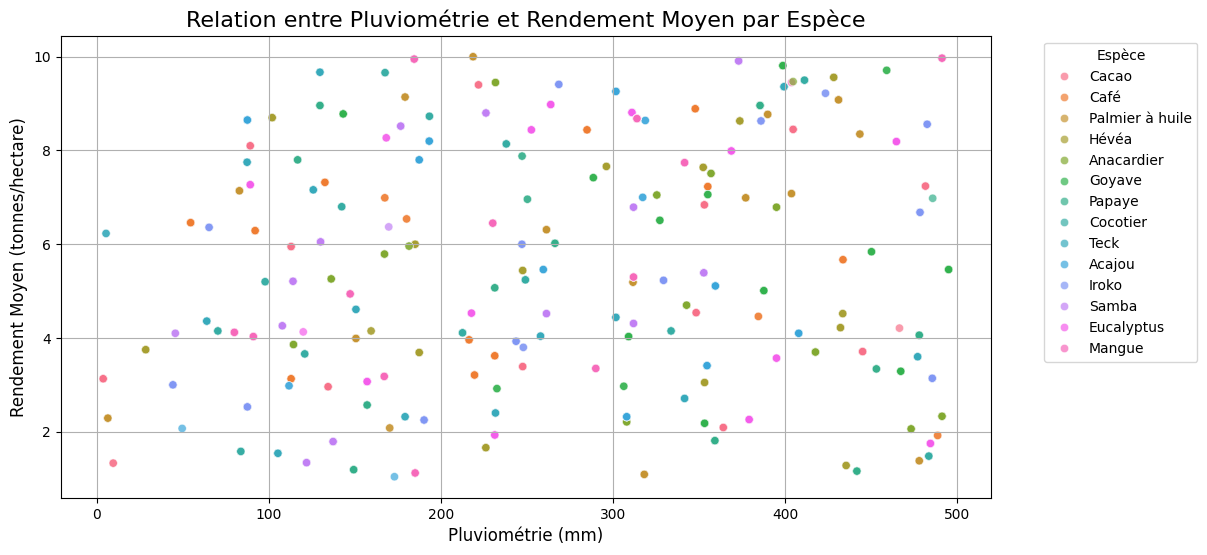

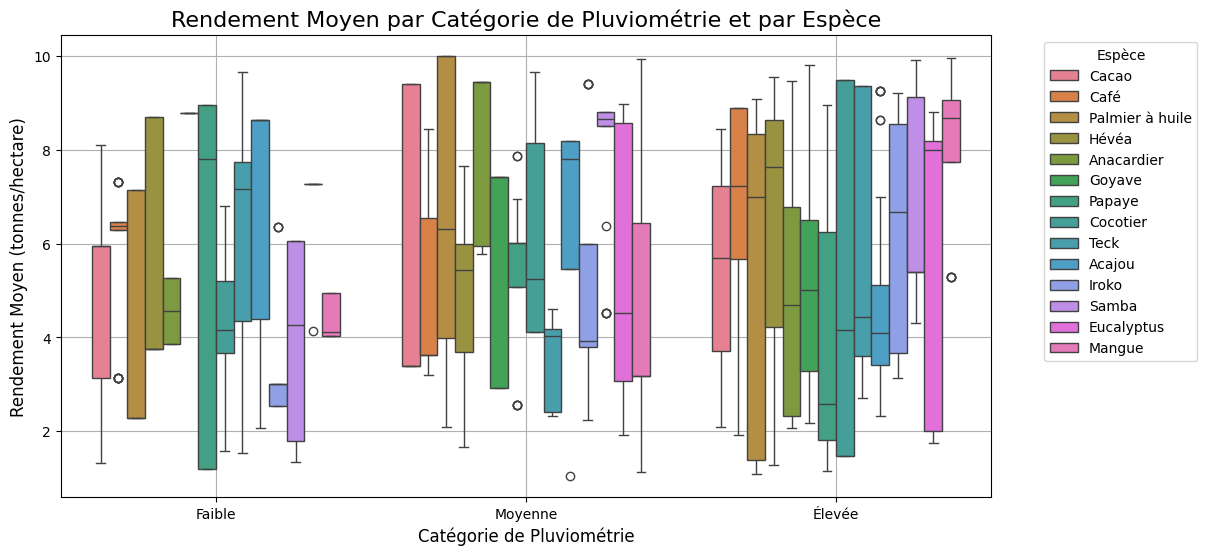

In [16]:
# Relation entre pluviométrie et rendement moyen selon les espèces
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataset, x='pluviometrie', y='rendement_moyen', hue='nom_espece', alpha=0.7)
plt.title('Relation entre Pluviométrie et Rendement Moyen par Espèce', fontsize=16)
plt.xlabel('Pluviométrie (mm)', fontsize=12)
plt.ylabel('Rendement Moyen (tonnes/hectare)', fontsize=12)
plt.legend(title='Espèce', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Boxplot pour la distribution des rendements par catégorie de pluviométrie et par espèce
# Catégorisation de la pluviométrie en faible, moyenne et élevée
bins = [0, 150, 300, 500]  # Plages arbitraires pour les catégories
labels = ['Faible', 'Moyenne', 'Élevée']
dataset_cleaned['categorie_pluviometrie'] = pd.cut(dataset_cleaned['pluviometrie'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset_cleaned, x='categorie_pluviometrie', y='rendement_moyen', hue='nom_espece')
plt.title('Rendement Moyen par Catégorie de Pluviométrie et par Espèce', fontsize=16)
plt.xlabel('Catégorie de Pluviométrie', fontsize=12)
plt.ylabel('Rendement Moyen (tonnes/hectare)', fontsize=12)
plt.legend(title='Espèce', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [21]:
dataset_cleaned.head()

,nom_region,nom_espece,superficie,pluviometrie,rendement_moyen,annee,temperature_moyenne,mois_plantation,log_pluviometrie,categorie_pluviometrie
0,Abidjan,Cacao,311.35,221.88,9.40,2019,25.670,4,5.406634,Moyenne
1,Abidjan,Cacao,141.35,221.88,9.40,2019,25.670,8,5.406634,Moyenne
2,Abidjan,Cacao,301.74,221.88,9.40,2019,25.670,3,5.406634,Moyenne
3,Abidjan,Café,114.35,92.11,6.29,2019,29.375,6,4.533782,Faible
4,Abidjan,Café,253.65,92.11,6.29,2019,29.375,12,4.533782,Faible


c:\Users\kadyk\Projets\INAD-CI-PROJECT\data_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


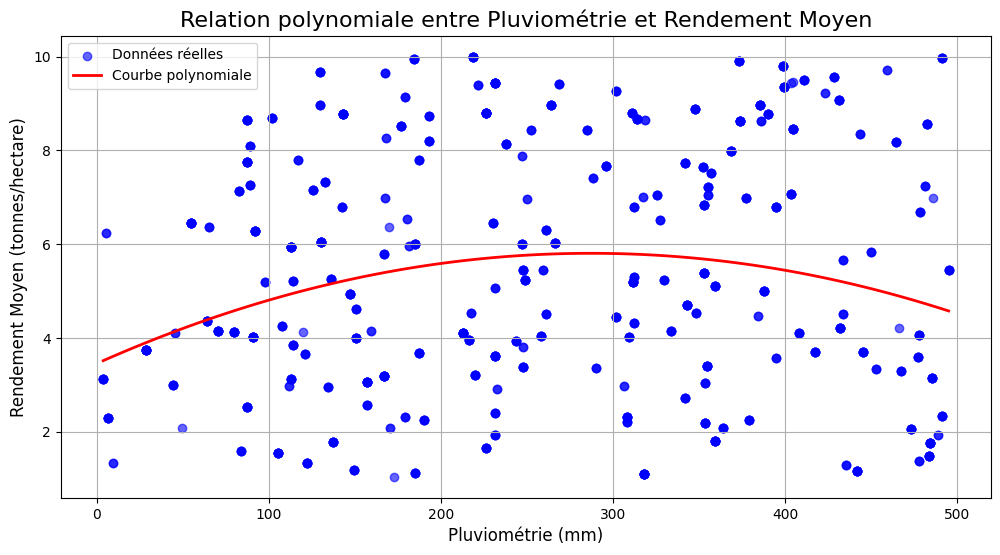

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(dataset_cleaned[['pluviometrie', 'temperature_moyenne']])
model = LinearRegression()
model.fit(X_poly, dataset_cleaned['rendement_moyen'])

# Extraire les coefficients du modèle (après fit)
coefficients = model.coef_
intercept = model.intercept_

# Plage de valeurs pour la pluviométrie
pluviometrie_range = np.linspace(dataset_cleaned['pluviometrie'].min(), dataset_cleaned['pluviometrie'].max(), 100)

# Température moyenne constante
temperature_constante = dataset_cleaned['temperature_moyenne'].mean()

# Créer les termes polynomiaux pour la plage de pluviométrie
X_plot = np.array([[p, temperature_constante] for p in pluviometrie_range])
X_plot_poly = poly.transform(X_plot)

# Calculer les rendements prédits en utilisant les coefficients du modèle
y_plot = np.dot(X_plot_poly, coefficients) + intercept

# Tracer la courbe polynomiale
plt.figure(figsize=(12, 6))
plt.scatter(dataset_cleaned['pluviometrie'], dataset_cleaned['rendement_moyen'], color='blue', label='Données réelles', alpha=0.6)
plt.plot(pluviometrie_range, y_plot, color='red', label='Courbe polynomiale', linewidth=2)
plt.title('Relation polynomiale entre Pluviométrie et Rendement Moyen', fontsize=16)
plt.xlabel('Pluviométrie (mm)', fontsize=12)
plt.ylabel('Rendement Moyen (tonnes/hectare)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Analyse entre la temperature et le rendement

c:\Users\kadyk\Projets\INAD-CI-PROJECT\data_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


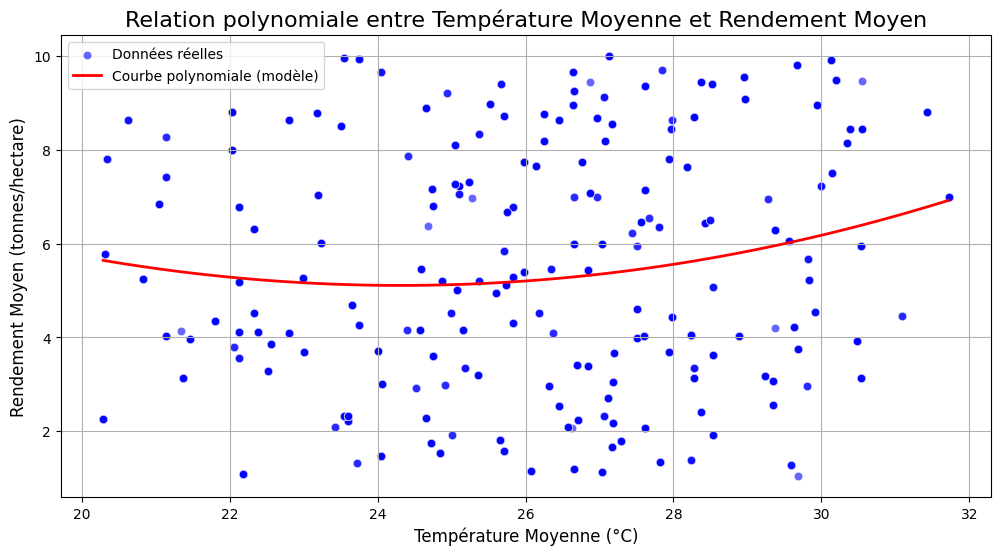

In [23]:
# Créer et ajuster le modèle polynomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(dataset_cleaned[['temperature_moyenne']])
model = LinearRegression()
model.fit(X_poly, dataset_cleaned['rendement_moyen'])

# Créer une plage de température moyenne pour tracer la courbe
temperature_range = np.linspace(dataset_cleaned['temperature_moyenne'].min(), dataset_cleaned['temperature_moyenne'].max(), 100).reshape(-1, 1)
temperature_range_poly = poly.transform(temperature_range)

# Prédictions du modèle
rendement_pred = model.predict(temperature_range_poly)

# Tracer les données réelles et la courbe polynomiale
plt.figure(figsize=(12, 6))
sns.scatterplot(x=dataset_cleaned['temperature_moyenne'], y=dataset_cleaned['rendement_moyen'], color='blue', label='Données réelles', alpha=0.6)
plt.plot(temperature_range, rendement_pred, color='red', label='Courbe polynomiale (modèle)', linewidth=2)
plt.title('Relation polynomiale entre Température Moyenne et Rendement Moyen', fontsize=16)
plt.xlabel('Température Moyenne (°C)', fontsize=12)
plt.ylabel('Rendement Moyen (tonnes/hectare)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Analyse entre la superficie et le rendement 

c:\Users\kadyk\Projets\INAD-CI-PROJECT\data_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


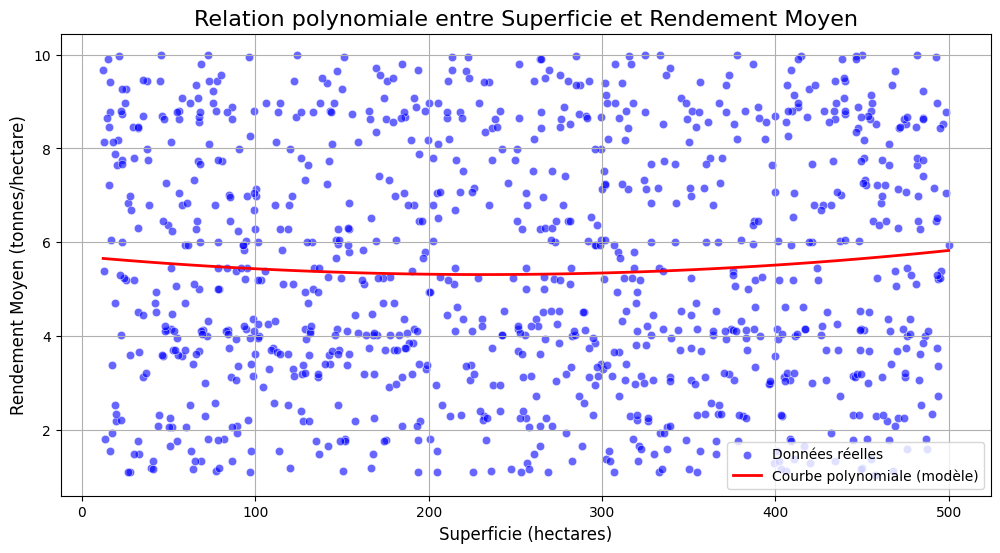

In [24]:
# Créer et ajuster le modèle polynomial pour la superficie
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(dataset_cleaned[['superficie']])
model = LinearRegression()
model.fit(X_poly, dataset_cleaned['rendement_moyen'])

# Créer une plage de valeurs pour la superficie pour tracer la courbe
superficie_range = np.linspace(dataset_cleaned['superficie'].min(), dataset_cleaned['superficie'].max(), 100).reshape(-1, 1)
superficie_range_poly = poly.transform(superficie_range)

# Prédictions du modèle
rendement_pred = model.predict(superficie_range_poly)

# Tracer les données réelles et la courbe polynomiale
plt.figure(figsize=(12, 6))
sns.scatterplot(x=dataset_cleaned['superficie'], y=dataset_cleaned['rendement_moyen'], color='blue', label='Données réelles', alpha=0.6)
plt.plot(superficie_range, rendement_pred, color='red', label='Courbe polynomiale (modèle)', linewidth=2)
plt.title('Relation polynomiale entre Superficie et Rendement Moyen', fontsize=16)
plt.xlabel('Superficie (hectares)', fontsize=12)
plt.ylabel('Rendement Moyen (tonnes/hectare)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()